<a href="https://colab.research.google.com/github/Manojgharge07/Crop_Recommendation_System/blob/main/Crop_Recommendation_System_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython import get_ipython

In [82]:
#Load the data set
df = pd.read_csv('/content/drive/MyDrive/All CSV files/crop.csv')

In [83]:
#Top 5 rows of data set
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [84]:
#Checking the data type of data set
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [85]:
#Check the data shape
df.shape 

(2200, 8)

In [86]:
#To check the null values in data set
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [87]:
#To check the duplicate values in data set
df.duplicated().sum()

0

In [88]:
#Check the columns present in data set
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [89]:
#Checking the info of our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [90]:
#To describe the data set
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [91]:
#Let we know the unique values in data
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [92]:
#Check the different crop
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [93]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [94]:
crop_summary = pd.pivot_table(df, index=['label'], aggfunc= 'median')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,200.0,24.0,136.5,92.416541,5.885818,112.979230,22.628290
banana,50.0,100.5,81.0,80.223599,5.994462,105.007750,27.443333
blackgram,19.0,41.0,67.0,65.026723,7.165240,68.293539,29.655515
chickpea,79.0,39.0,68.0,16.658634,7.356537,79.692282,18.878291
coconut,31.0,24.0,15.5,94.960581,5.990709,171.999922,27.385317
coffee,30.0,103.0,29.0,57.648083,6.798626,157.770963,25.656643
cotton,19.0,117.0,46.0,80.010893,6.840957,80.237095,23.964997
grapes,201.0,24.0,133.0,81.724647,6.001785,69.536186,23.018528
jute,40.0,78.0,46.0,79.469205,6.711500,175.590814,24.971106


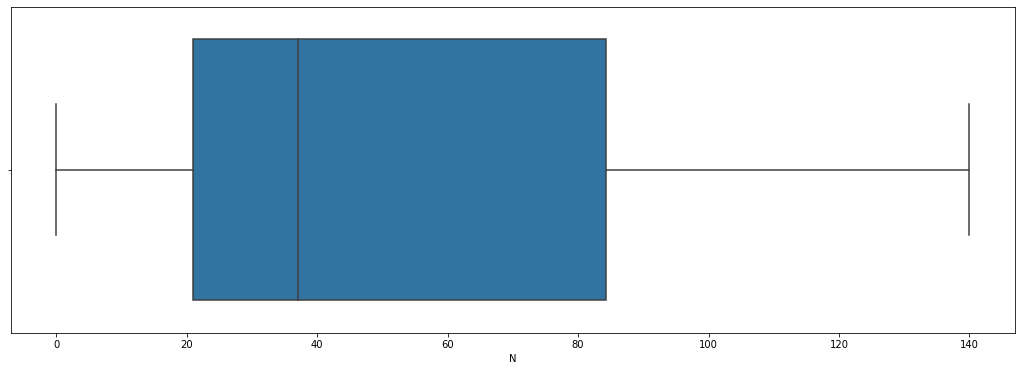

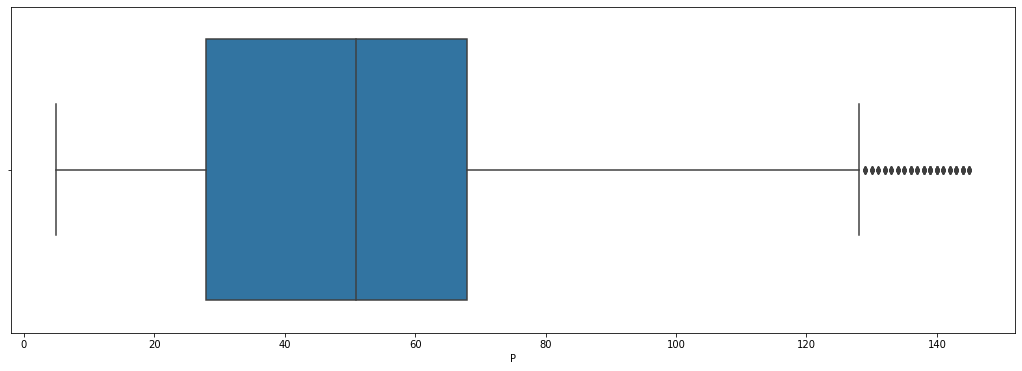

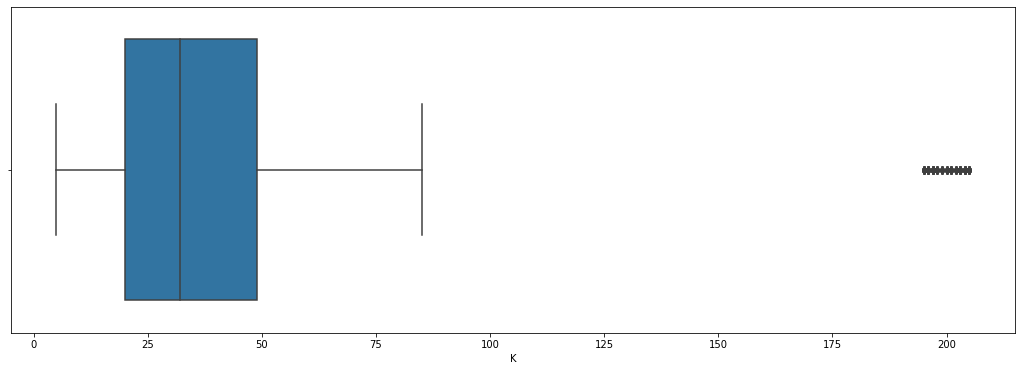

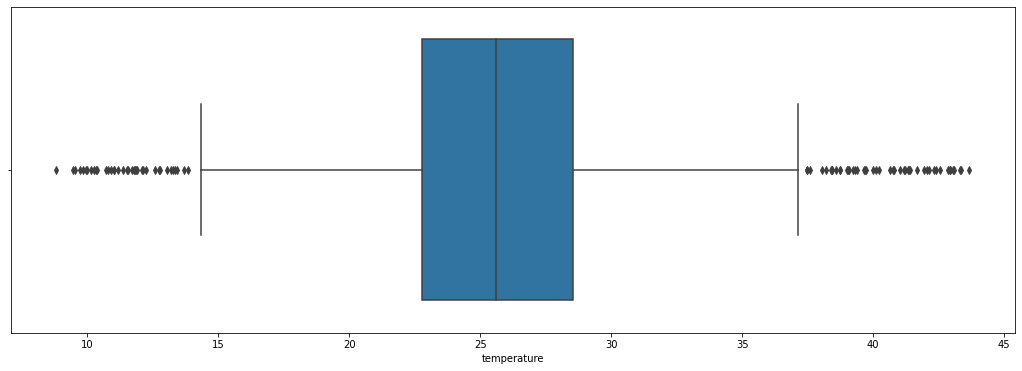

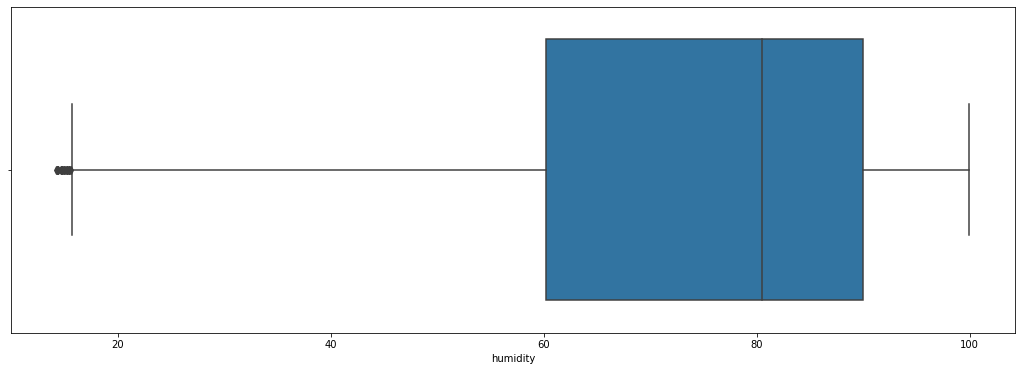

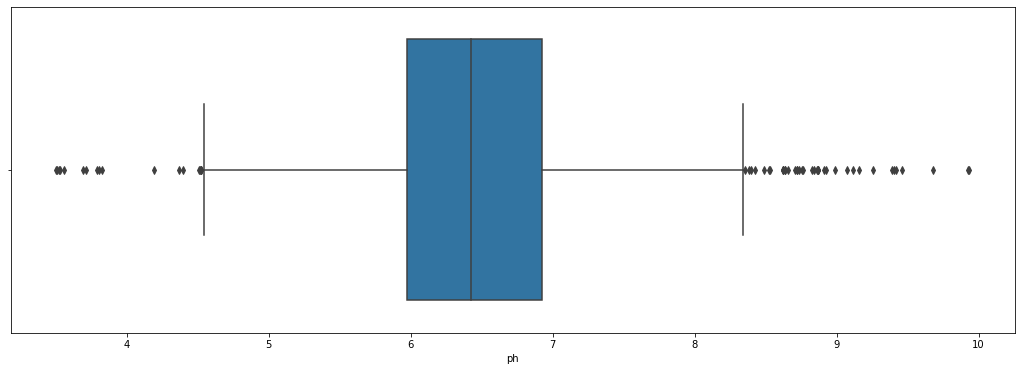

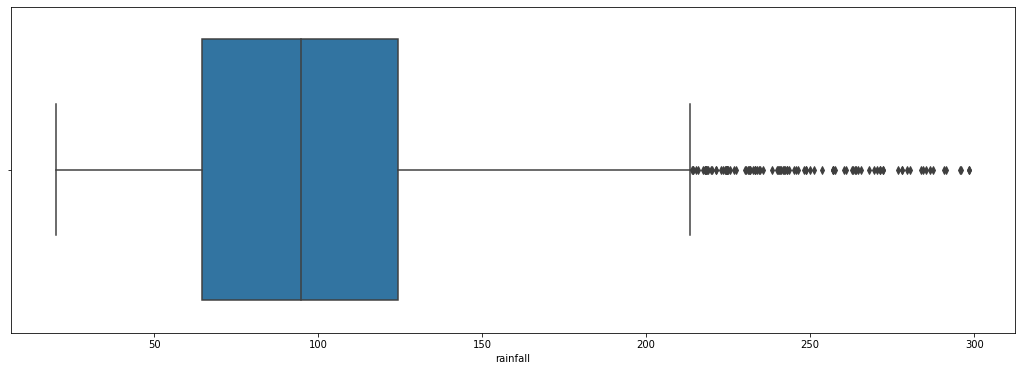

In [95]:
#Checking the outliers
df1 = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
for i in df1.columns:
  plt.figure(figsize=(18,6))
  sns.boxplot(df1[i])
  plt.xticks()
plt.show()

In [96]:
print(np.where(df1['rainfall'] > 220))

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   15,   16,   18,   19,   21,   23,   24,   25,   26,   27,
         28,   30,   32,   33,   34,   36,   37,   38,   39,   40,   43,
         44,   47,   49,   53,   54,   55,   57,   59,   60,   61,   62,
         64,   67,   68,   69,   71,   72,   74,   75,   76,   82,   84,
         85,   86,   88,   89,   90,   91,   93,   94,   96,   97, 1700,
       1703, 1712, 1723, 1726, 1758, 1759, 1778, 1783, 1784, 1787, 1793,
       1797, 1800, 1801, 1849, 1859, 1865, 1881, 1892, 1894]),)


In [97]:
print(len(np.where(df1['rainfall'] > 220)))

1


In [98]:
#Q1 = 25%
Q1 = np.percentile(df1['rainfall'],25, interpolation= 'midpoint')

In [99]:
#Q3 = 75%
Q3 = np.percentile(df1['rainfall'],75, interpolation= 'midpoint')

In [100]:
IQR = Q3-Q1

In [101]:
#Upper bound values(Outliers)
upper_bound = Q3 + 1.5* IQR

In [102]:
#Lower bound values(Outliers)
lower_bound = Q1 - 1.5* IQR

In [103]:
#To checkCondition is satisfy or not
#If condition is satisfy then it is True else False
print(df['rainfall']> upper_bound)

0       False
1        True
2        True
3        True
4        True
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Name: rainfall, Length: 2200, dtype: bool


In [104]:
print(df['rainfall']> lower_bound)

0       True
1       True
2       True
3       True
4       True
        ... 
2195    True
2196    True
2197    True
2198    True
2199    True
Name: rainfall, Length: 2200, dtype: bool


In [105]:
#Find the 6th location values
print(df.iloc[6])

N                     69
P                     55
K                     38
temperature    22.708838
humidity       82.639414
ph              5.700806
rainfall       271.32486
label               rice
Name: 6, dtype: object


In [106]:
#Crop summary
crop_summary_new = crop_summary.reset_index()
crop_summary_new

,label,K,N,P,humidity,ph,rainfall,temperature
0,apple,200.0,24.0,136.5,92.416541,5.885818,112.979230,22.628290
1,banana,50.0,100.5,81.0,80.223599,5.994462,105.007750,27.443333
2,blackgram,19.0,41.0,67.0,65.026723,7.165240,68.293539,29.655515
3,chickpea,79.0,39.0,68.0,16.658634,7.356537,79.692282,18.878291
4,coconut,31.0,24.0,15.5,94.960581,5.990709,171.999922,27.385317
5,coffee,30.0,103.0,29.0,57.648083,6.798626,157.770963,25.656643
6,cotton,19.0,117.0,46.0,80.010893,6.840957,80.237095,23.964997
7,grapes,201.0,24.0,133.0,81.724647,6.001785,69.536186,23.018528
8,jute,40.0,78.0,46.0,79.469205,6.711500,175.590814,24.971106
9,kidneybeans,20.0,22.0,67.0,21.348735,5.745283,107.399392,19.924037


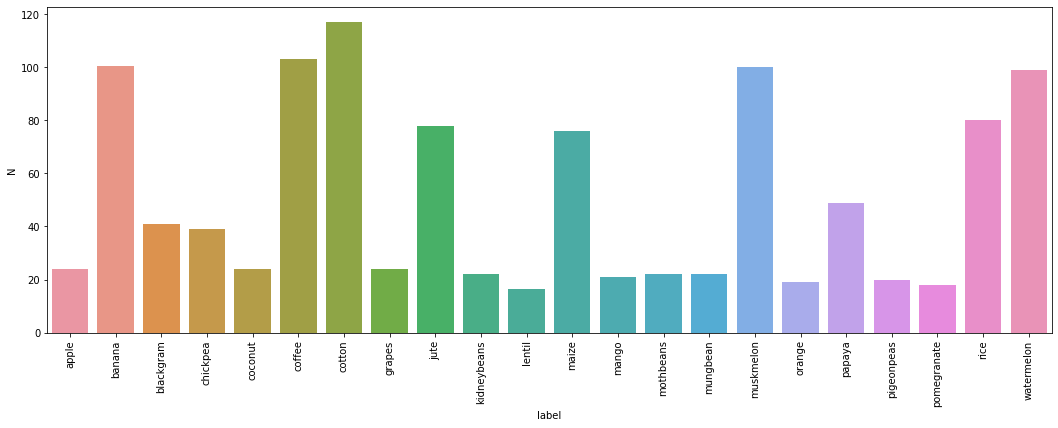

In [107]:
#Drow bar plot for N
plt.figure(figsize=(18,6))
sns.barplot(x = 'label', y = 'N', data = crop_summary_new )
plt.xticks(rotation = 90)
plt.show()

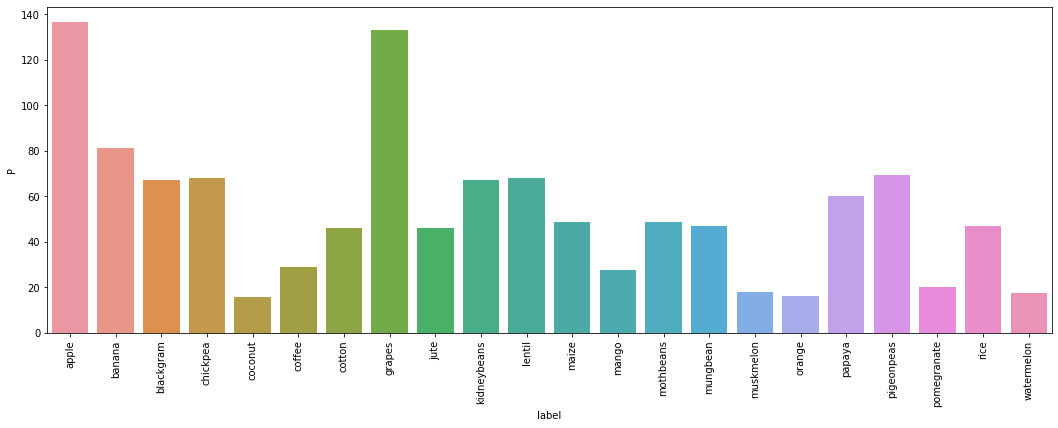

In [108]:
#Drow bar plot for P
plt.figure(figsize=(18,6))
sns.barplot(x = 'label', y = 'P', data = crop_summary_new )
plt.xticks(rotation = 90)
plt.show()

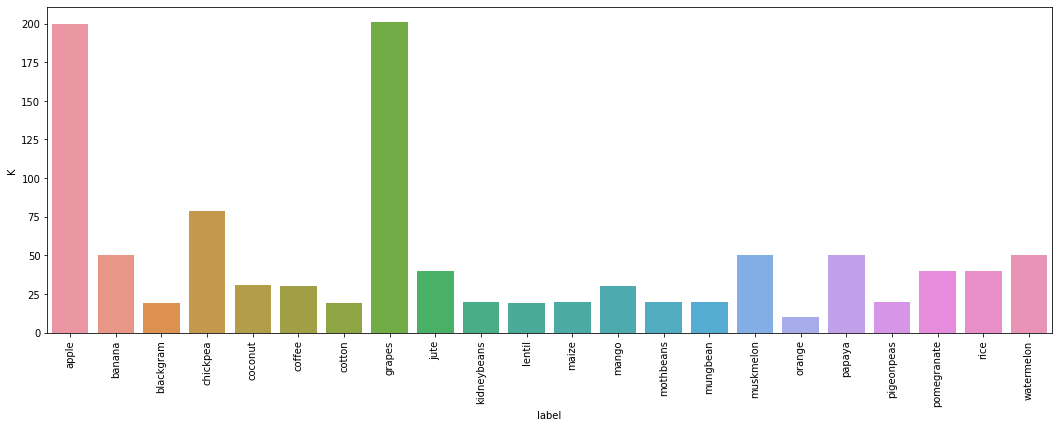

In [109]:
#Drow bar plot for K
plt.figure(figsize=(18,6))
sns.barplot(x = 'label', y = 'K', data = crop_summary_new )
plt.xticks(rotation = 90)
plt.show()

In [110]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [112]:
#While using plotly for N
fig1 = px.bar(crop_summary_new, x = 'label', y = 'N')
fig1.show()

In [113]:
#While using plotly for P
fig1 = px.bar(crop_summary_new, x = 'label', y = 'P')
fig1.show()

In [114]:
#While using plotly for K
fig1 = px.bar(crop_summary_new, x = 'label', y = 'K')
fig1.show()

In [115]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [116]:
import random

In [37]:
crop_summary_N = crop_summary.sort_values(by='N', 
                                          ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=7, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [38]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=7, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [44]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=7, 
                  font_color='black',
                  height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [117]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [118]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = crop_summary[crop_summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

jute_npk = crop_summary[crop_summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

lentil_npk = crop_summary[crop_summary.index=='lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=7, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.8, font_size=7, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=7, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=7, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.8, font_size=7, showarrow=False)])
fig.show()

In [119]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[
         {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)
cafe_colors =  ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

apple_npk = crop_summary[crop_summary.index=='apple']
values = [apple_npk['N'][0], apple_npk['P'][0], apple_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Apple", marker_colors=cafe_colors),1, 1)

banana_npk = crop_summary[crop_summary.index=='banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Banana", marker_colors=cafe_colors),1, 2)

grapes_npk = crop_summary[crop_summary.index=='grapes']
values = [grapes_npk['N'][0], grapes_npk['P'][0], grapes_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Grapes", marker_colors=cafe_colors),1, 3)

orange_npk = crop_summary[crop_summary.index=='orange']
values = [orange_npk['N'][0], orange_npk['P'][0], orange_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Orange", marker_colors=cafe_colors),1, 4)

mango_npk = crop_summary[crop_summary.index=='mango']
values = [mango_npk['N'][0], mango_npk['P'][0], mango_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Mango", marker_colors=cafe_colors),1, 5)

coconut_npk = crop_summary[crop_summary.index=='coconut']
values = [coconut_npk['N'][0], coconut_npk['P'][0], coconut_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Coconut", marker_colors=cafe_colors),2, 1)

papaya_npk = crop_summary[crop_summary.index=='papaya']
values = [papaya_npk['N'][0], papaya_npk['P'][0], papaya_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Papaya", marker_colors=cafe_colors),2, 2)

pomegranate_npk = crop_summary[crop_summary.index=='pomegranate']
values = [pomegranate_npk['N'][0], pomegranate_npk['P'][0], pomegranate_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Pomegranate", marker_colors=cafe_colors),2, 3)

watermelon_npk = crop_summary[crop_summary.index=='watermelon']
values = [watermelon_npk['N'][0], watermelon_npk['P'][0], watermelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Watermelon", marker_colors=cafe_colors),2, 4)

muskmelon_npk = crop_summary[crop_summary.index=='muskmelon']
values = [muskmelon_npk['N'][0], muskmelon_npk['P'][0], muskmelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Muskmelon", marker_colors=cafe_colors),2, 5)

fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[dict(text='Apple',x=0.06,y=1.08, font_size=7, showarrow=False),
                 dict(text='Banana',x=0.26,y=1.08, font_size=7, showarrow=False),
                 dict(text='Grapes',x=0.50,y=1.08, font_size=7, showarrow=False),
                 dict(text='Orange',x=0.74,y=1.08, font_size=7, showarrow=False),
                dict(text='Mango',x=0.94,y=1.08, font_size=7, showarrow=False),
                dict(text='Coconut',x=0.06,y=0.46, font_size=7, showarrow=False),
                 dict(text='Papaya',x=0.26,y=0.46, font_size=7, showarrow=False),
                 dict(text='Pomegranate',x=0.50,y=0.46, font_size=7, showarrow=False),
                 dict(text='Watermelon',x=0.74,y=0.46, font_size=7, showarrow=False),
                dict(text='Muskmelon',x=0.94,y=0.46, font_size=7, showarrow=False)])
fig.show()

In [120]:
crop_scatter = df[(df['label']=='rice') | 
                      (df['label']=='jute') | 
                      (df['label']=='cotton') |
                     (df['label']=='maize') |
                     (df['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='pink')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

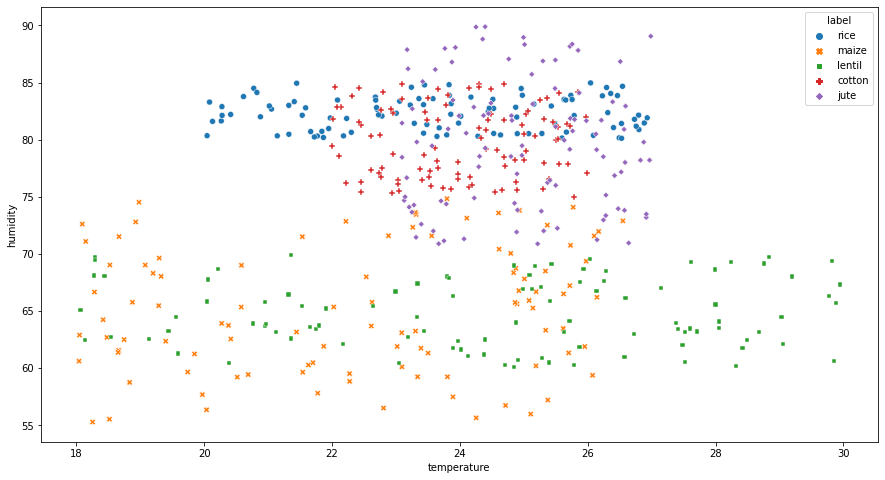

In [121]:
plt.figure(figsize=(15,8))
crop_scatter = df[(df['label']=='rice') | 
                      (df['label']=='jute') | 
                      (df['label']=='cotton') |
                     (df['label']=='maize') |
                     (df['label']=='lentil')]
sns.scatterplot(data=crop_scatter, x="temperature", y="humidity" , hue ='label' , style="label")

In [122]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Check the corelation

In [123]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


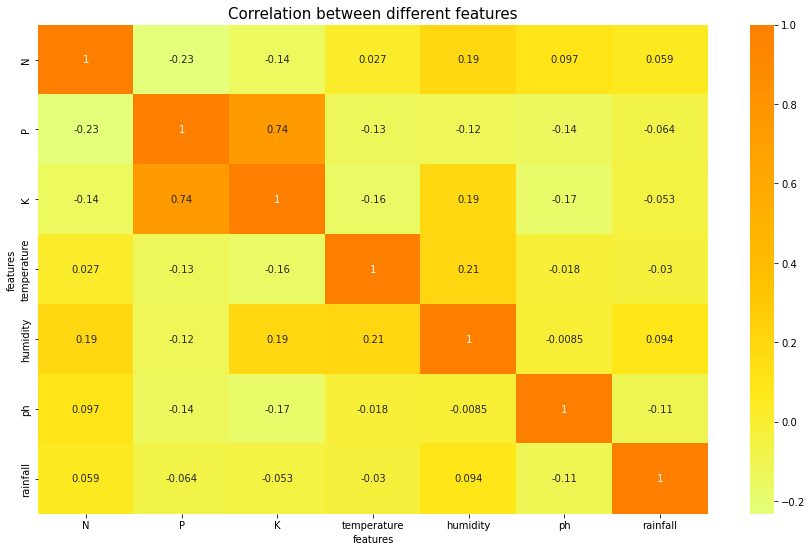

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [125]:
X = df.drop('label', axis = 1)
y = df['label']
print(X)
y

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                    shuffle = True, random_state = 0)

In [127]:
print(X_train.head(), '\n\n')
print(X_test.head(), '\n\n')
print(y_train.head(), '\n\n')
print(y_test.head(), '\n\n')

        N    P    K  temperature   humidity        ph    rainfall
1829   33   14   35    27.148653  96.663552  6.027707  149.243350
1051  116   81   55    26.423133  83.699504  5.915546   95.123221
347    13   72   21    24.321166  21.027867  5.821194   60.275525
1576   30  137  200    22.914300  90.704756  5.603413  118.604465
121    99   50   15    18.147101  71.094453  5.573286   88.077537 


        N    P    K  temperature   humidity        ph   rainfall
1320  105   14   50    26.214884  87.688398  6.419052  59.655908
1367   91   12   46    24.644585  85.499382  6.343943  48.312190
1291   14  121  203     9.724458  83.747656  6.158689  74.464111
264    52   73   79    17.257695  18.749440  7.840339  94.002872
728    32   66   17    34.946616  65.267740  7.162358  70.141514 


1829        coconut
1051         banana
347     kidneybeans
1576          apple
121           maize
Name: label, dtype: object 


1320    watermelon
1367    watermelon
1291        grapes
264       chickpea
72

In [128]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [129]:
y_pred = model.predict(X_test)
y_pred

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'rice', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'blackgram', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute',

In [130]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Light GBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Light GBM Model accuracy score: 0.9876


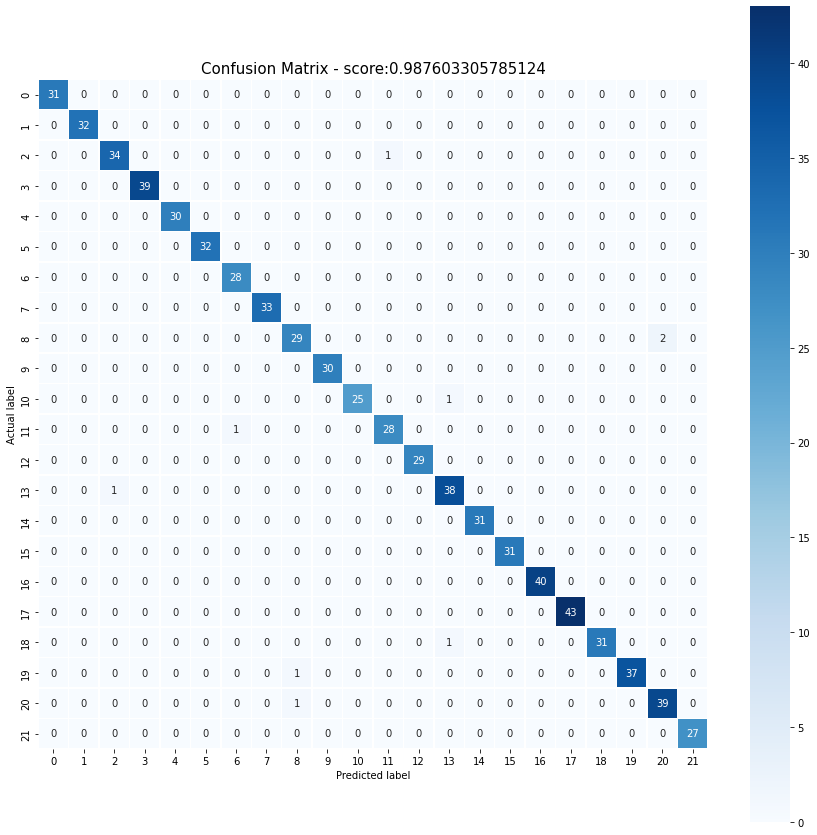

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.97      0.97        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        33
        jute       0.94      0.94      0.94        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.96      0.98        26
       maize       0.97      0.97      0.97        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.95      0.97      0.96        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

In [133]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)

In [134]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [135]:
y_pred=classifier.predict(X_test)

In [136]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Decision Tree Model accuracy score: 0.9848


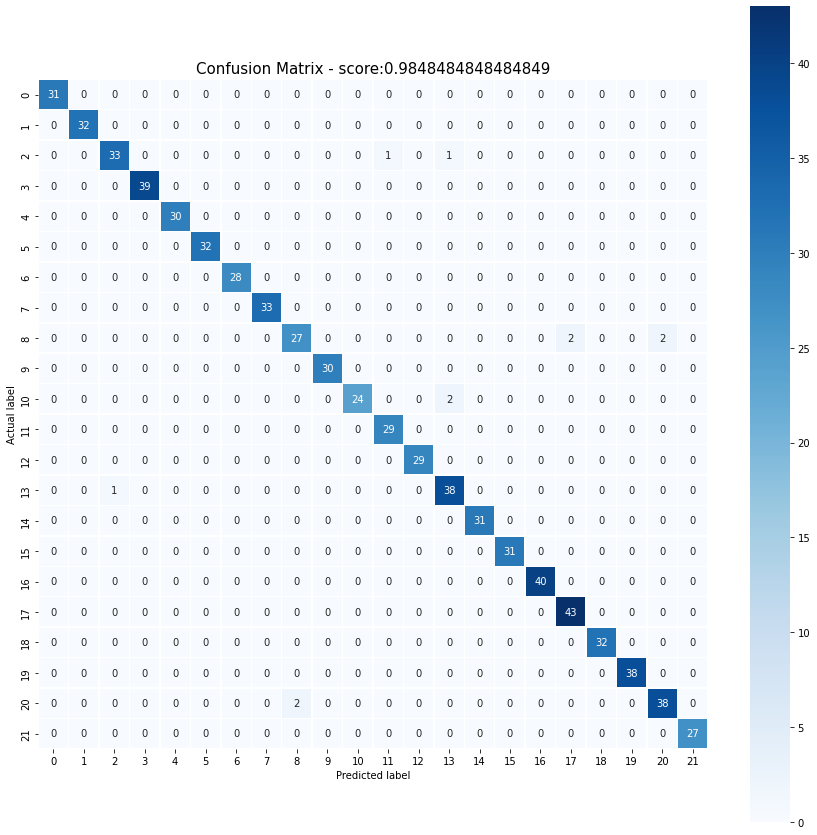

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.94      0.96        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.93      0.87      0.90        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.92      0.96        26
       maize       0.97      1.00      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.93      0.97      0.95        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       0.96    

In [139]:
from sklearn.ensemble import RandomForestClassifier  
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [140]:
y_pred= classifier_rf.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Random Forest Model accuracy score: 0.9931


In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      1.00      0.99        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.97      0.97      0.97        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.96      0.98        26
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.97      0.97      0.97        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       0.97      1.00      0.98        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

# Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr

LogisticRegression(random_state=0)

In [144]:
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [145]:
y_pred = classifier_lr.predict(X_test)

In [146]:
#Logistic Regression Model accuracy score
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print(' Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

 Logistic Regression Model accuracy score: 0.9435


In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.85      0.83      0.84        35
    chickpea       1.00      1.00      1.00        39
     coconut       0.94      1.00      0.97        30
      coffee       1.00      1.00      1.00        32
      cotton       0.85      1.00      0.92        28
      grapes       1.00      1.00      1.00        33
        jute       0.85      0.90      0.88        31
 kidneybeans       0.91      0.97      0.94        30
      lentil       0.89      0.92      0.91        26
       maize       0.96      0.83      0.89        29
       mango       0.91      1.00      0.95        29
   mothbeans       0.85      0.85      0.85        39
    mungbean       1.00      0.97      0.98        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       0.97    